<a href="https://colab.research.google.com/github/davidpirts/CIFAR10-without-convolutions/blob/master/flowpm_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount the drive for saving the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Run this if you are on colab
!pip install git+https://github.com/modichirag/flowpm.git
!git clone https://github.com/modichirag/flowpm.git 

  Cloning https://github.com/modichirag/flowpm.git to /tmp/pip-req-build-fgeo8i_v
  Running command git clone -q https://github.com/modichirag/flowpm.git /tmp/pip-req-build-fgeo8i_v
     |████████████████████████████████| 368kB 22.1MB/s 
  Created wheel for flowpm: filename=flowpm-0.1rc2.dev257+g87ded06-cp36-none-any.whl size=33764 sha256=c053b971ae03611cc586aa8295681c5ea9e07347bdcfdd0490dda6fefda82d47
  Stored in directory: /tmp/pip-ephem-wheel-cache-w_qofkxz/wheels/c9/23/31/1ea68dc6cc2385226f39532d708dba63dd1c5b081acdc14705
Successfully built flowpm
Cloning into 'flowpm'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 1892 (delta 92), reused 61 (delta 28), pack-reused 1738
Receiving objects: 100% (1892/1892), 9.03 MiB | 29.44 MiB/s, done.
Resolving deltas: 100% (1246/1246), done.


In [15]:
%pylab inline
import tensorflow as tf
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

# You may need to adapt this path depending on where you are running the notebook
# This is the power spectrum of initial conditions
klin = np.loadtxt('flowpm/flowpm/data/Planck15_a1p00.txt').T[0]
plin = np.loadtxt('flowpm/flowpm/data/Planck15_a1p00.txt').T[1]

ipklin = iuspline(klin, plin)

Populating the interactive namespace from numpy and matplotlib


In [16]:
import flowpm

stages = np.linspace(0.1, 1.0, 10, endpoint=True)

initial_conditions = flowpm.linear_field(32,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=500)

# Sample particles
state = flowpm.lpt_init(initial_conditions, a=0.1)   

# Evolve particles down to z=0
final_state = flowpm.nbody(state, stages, 32)         

# Retrieve final density field
final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])

In [20]:
print(initial_conditions.shape, final_field.shape)
print(type(initial_conditions), type(final_field))

(500, 32, 32, 32) (500, 32, 32, 32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


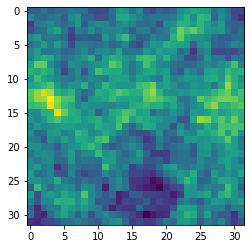

In [18]:
imshow(initial_conditions[12].numpy().sum(axis=0))

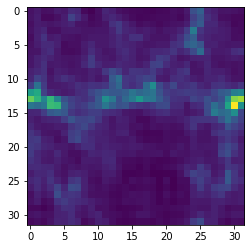

In [19]:
imshow(final_field[12].numpy().sum(axis=0))